# Biography of the American Revolution Bonds
**Goal:** Qualitative and quantitative analysis of the bonds used to fund the American Revolution.

**Team Members**: Elizabeth Zhang, Isabella Smojver, Miritika Omkumar, Sanjeev Subramanian
**Supervisor**: Chris Liao

**Outline**:
1. **Section 1:** Introduction about the American Revolution
2. **Section 2:** Qualitative Analysis of the Bonds that Funded the Revolution (pre-1790 Certificates)
   
   a. Details about Loan Office Certificates

   b. Details about Liquidated Debt Certificates

   c. Details about Pierce Certificates
   
3. **Section 3:** Quantitative Analysis of the Bonds that Repaid Accumulated Revolutionary War Debt (post-1790 Bonds)

## Section 1: Introduction
The American Revolution was a war won with both strategy and support. Here, we focus on how they obtained their support. The colonies were up against a monumental & wealthy oponent in the British. To fight the war they needed supplies such as cannons, pistols, and personal equipment. Public support from smaller investors was needed to fund the war, especially before international aid from France and the Netherlands had arrived. These bonds were the payment to suppliers and served as a notes of indebtedness from the Continental Congress, because they could not pay the full capital up front. The Continental Congress issued loan office certificates, liquidated debt certificates and Pierce certificates, which we will describe in more detail. Note that in this context, the words certificate, stocks and bonds are equivalent financial instruments. 

#### Table of Revolutionary War Funding Sources
Note that these bonds were not the only way the war was funded. Notably, Congress also printed lots of paper money, although we're less interested in them because Congress did not end up redeeming them at anything close to par.

![alt text](https://allthingsliberty.com/wp-content/uploads/2015/01/costchart.jpg)
Estimated Funding Sources (https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/ ) 

The above table shows the sources of funding for the American Revolution, breaking down the most common types of borrowed funds and newly minted money from both Federal and State sources. This was calculated in millions of pounds of sterling. 

## Section 2: Pre-1790 Certificates

### Section 2a: Loan Office Certificates
#### Purpose of Issuance 
Loan office certificates were required for domestic financing loans to pay for supplies, soldiers, and weaponry maintenance. It was not until the 16th Amendment to the Constitution that Congress was able to levy and collect taxes from the public, thus most funding of the Revolution was based on borrowing *(National Archives)*.

#### Who Promised to Repay the Loan?
The Continental Congress authorized warrants allowing various loan offices to issue loan office certificates. Most of these Loan Office Certificates were issued by public officials operating in the Quartermaster and Commissary departments, who dealt with the procurement of supplies and paying soldiers' wages. Individuals who went to loan offices to redeem their certificates often faced extreme difficulties, "experiencing the full negative consequences of Congress's inflationary policy regarding the dollar," with the transaction details often being, "vague,"*(Thompson 2023)*.

#### Who was Receiving the Payment?
Individuals and firms who produced supplies used for the war by Congress. Services included contracts for production of shells and cannons; after each contract was fulfilled, Continental Congress (CC) representatives would authorize a warrant issue from a loan office. 

#### Bond Features
- **Initial Coupon Rate** : 4% in 1776 
- **Final Coupon Rate**: 6% in 1777
    - Due to a lack of public support, Congress raised the interest rate 
- **Principal Values**: Varied between 200 and 10,000 Continental Dollars
- **Redemption Date**: Originally due in 1787

#### Authorization Details
We don't know the exact dollar amount Congress expected to borrow However, there were 80,913 loan office certificates issued between December 1776 and December 1781. <span style = "color:red">Once we look into the speculation data, we should tally the dollar quantity of loan office certificates we have</span> 

#### Debt Marketing
Many financiers during the American Revolution opened trading houses to help every day investors to broker their loan certificates. In the March 8th, 1783 Pennsylvania Journal and Weekly Advertiser, finanicer Haym Salomon lists his services open to the public. *(Herbstman Collection)*. Similarly, many loan offices would post in weekly advertisements to reach larger audiences. 

According to Massachusetts State Revolutionary War Debt Certificates, after 1780, inflation made it too difficult for standard office certificates to continue to be issued. Thus, there was a transition to compensating soldiers in the form of commodity certificates, [“Nominal sum would be paid out in the equivalent cost of 5 bushels of corn, 68 and 4/7 pounds of beef, 10 pounds of sheep’s wool, and 16 pounds of sole leather at the time of redemption.”]((State Revolutionary War Debt Certificates, 1777-1789. (2024). Masshist.org. https://www.masshist.org/collection-guides/view/fao0004)). This is also documented by Robert Shiller in this [paper](https://www.nber.org/system/files/working_papers/w10183/w10183.pdf)

#### Who were the creditors?
The primary creditors were investors supporting the war effort. We know that the top purchasers were men who were responsible for directly supplying the Army. Most bondholders were investors with total purchases directly from the loan of under $100 in specie. Based on how financial services were marketed, it seems as though the investors involved in purchasing loan office certificates did a majority of their business with the government rather than for personal wealth accrual. We know that prominent figures such as Stephen Payne, Abigal Adams, and William Choate all had certificates issued to them. 

In the archives of Nathaniel Appleton, a Continental Loan Officer in Massachusetts, many of those who had bonds issued to them were merchants. For example, Timothy Dexter and Samuel Phillips were merchants producing ships and gunpowder respectively *(Massachusetts Historical Society)*. 

#### Bond Price History
Eventually, due to heavy depreciation of the continental dollar, loan office certificates were valued against a depreciation schedule of the Continental dollar and assigned an associated specie value. This was the value loan office certificates were ultimately redeemed at. 

In a Congressional Resolution made on September 10, 1777, it was decided that interest accrued after the passing of the document on Loan Office Certificates issued before March 1 1778 would be paid annually at the rate of five livres for every Spanish milled dollar, or in Continental Bills of Credit. 

In a second decision made on December 29, 1777, Congress directed Commissioners of Loan Offices to pay interest based on instructions of the Board of Treasury. *(Gilder Lehrman Institute)*. 

#### Loan Contract Revisions
The most prominent revision increasing the interest rate by Continental Congress in 1777 from 4% to 6% which made it more appealing for investors. 


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
!pip install numpy
import numpy as np 



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


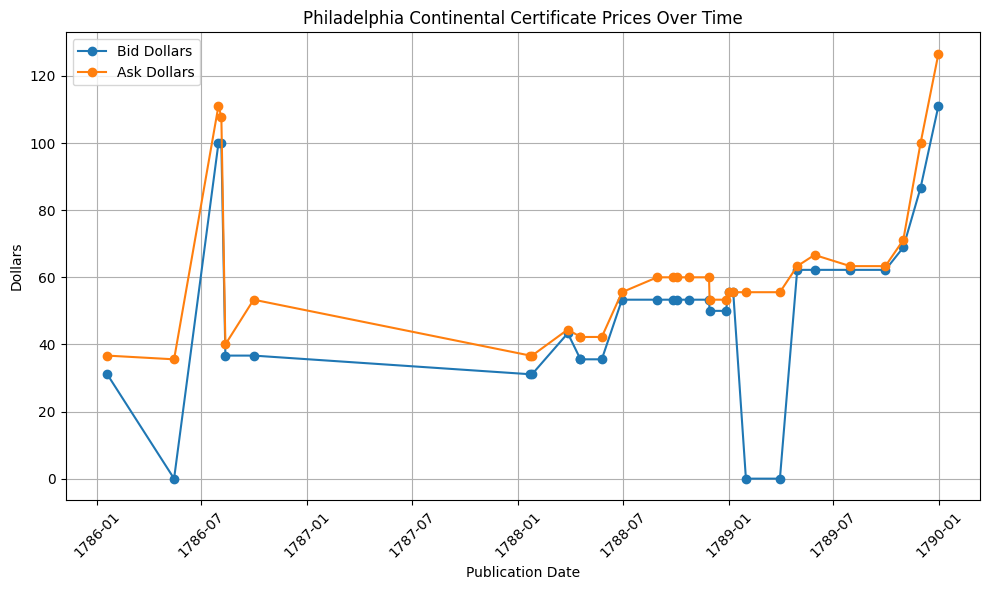

In [17]:
df = pd.read_csv(r'C:\Users\ezlan\Downloads\Philly_ContinentalCertificates.csv')

subset = ['Publication Date', 'Unnamed: 7', 'Unnamed: 8']
df = df[subset]
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

if 'publication date' in df.columns:
    df['publication date'] = pd.to_datetime(df['publication date'], errors='coerce')
    df.set_index('publication date', inplace=True)
else:
    print("Column 'publication date' not found. Available columns are:", df.columns)

df['unnamed: 7'] = pd.to_numeric(df['unnamed: 7'], errors='coerce')
df['unnamed: 8'] = pd.to_numeric(df['unnamed: 8'], errors='coerce')

df = df.dropna(subset=['unnamed: 7', 'unnamed: 8'])

plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by='publication date')
plt.plot(df_sorted.index, df_sorted['unnamed: 7'], label='Bid Dollars', marker='o')
plt.plot(df_sorted.index, df_sorted['unnamed: 8'], label='Ask Dollars', marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Dollars')
plt.title('Philadelphia Continental Certificate Prices Over Time')
date_form = DateFormatter("%Y-%m")

plt.xticks(rotation=45)
plt.tight_layout() 
plt.legend()
plt.grid(True) 


This graph shows the average pricing of Philadelphia's Loan Office Certificates over time: from 1786 to 1790. Both bid and ask dollar amounts are calculated using an exchange rate of 90 pennies to 1 dollar. The general increase in certificate pricing over time may point towards the inflation that occurred throughout the Revolution as well as multiple changes in the regulation of office certificates


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


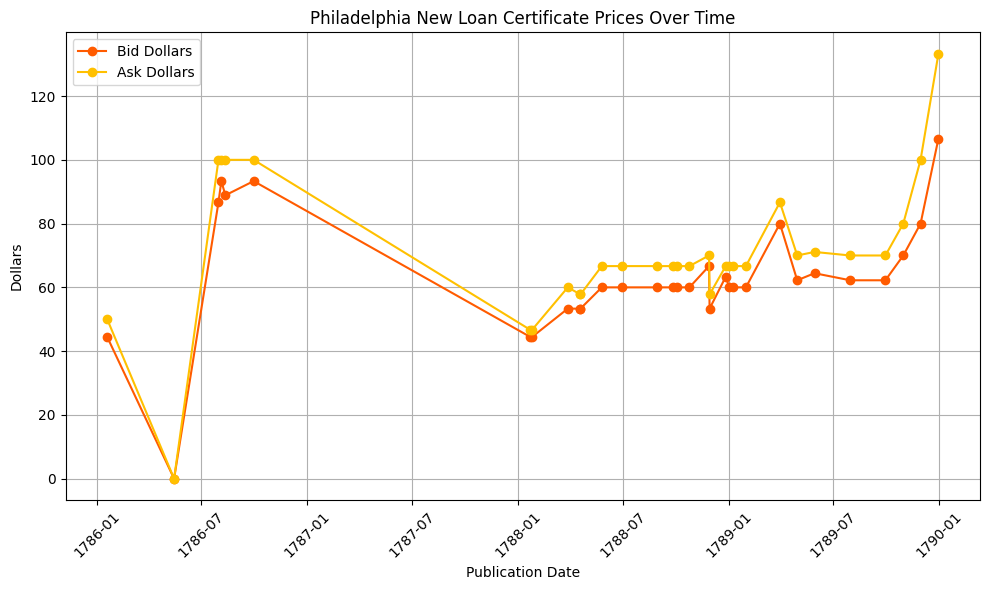

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
!pip install numpy
import numpy as np 

df = pd.read_csv(r'C:\Users\ezlan\Downloads\Philly_NewLoan_Certificates.csv')

subset = ['Publication Date', 'Unnamed: 7', 'Unnamed: 8']
df = df[subset]
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

if 'publication date' in df.columns:
    df['publication date'] = pd.to_datetime(df['publication date'], errors='coerce')
    df.set_index('publication date', inplace=True)
else:
    print("Column 'publication date' not found. Available columns are:", df.columns)

df['unnamed: 7'] = pd.to_numeric(df['unnamed: 7'], errors='coerce')
df['unnamed: 8'] = pd.to_numeric(df['unnamed: 8'], errors='coerce')

df = df.dropna(subset=['unnamed: 7', 'unnamed: 8'])

plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by='publication date')
plt.plot(df_sorted.index, df_sorted['unnamed: 7'], label='Bid Dollars', color='#ff5b00', marker='o')
plt.plot(df_sorted.index, df_sorted['unnamed: 8'], label='Ask Dollars', color='#ffc000', marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Dollars')
plt.title('Philadelphia New Loan Certificate Prices Over Time')
date_form = DateFormatter("%Y-%m")

plt.xticks(rotation=45)
plt.tight_layout() 
plt.legend()
plt.grid(True) 


This graph illustrates the average pricing of New Loan Certificates in Philadelphia over time. New Loan Certificates were also known as Nicholson's Notes after John Nicholson who was Pennsylvania's Comptroller General. Nicholson was in charge of authorizing and receiving taxes, and issuing state-backed debt in the form of certificates. These certificates were intended to raise state funds with the promise to investors of repayment with interest. 

### Section 2b: Liquidated Debt Certificates
#### Issuance Motivation
The motivation behind liquidated debt certificates is overlaps that of loan office certificates, to domestically fund the Revolution. However, these became a commonplace after the stability of loan office certificates deteriorated due to its direct connection to the failing Continental dollar. These certificates allowed for individual states to pay their own debts that were incurred during the war. *(Massachusetts History Collection)*. 

Further, liqudated debt certificates were a tool to consolidate public debt by settling claims of individual citizens. 

#### Who Promised to Repay the Loan?
Similar to loan office certificates, most liquidated debt certificates were issued by public officials operating in the Quartermaster and Commissary departments. These officials were led by the Continental Congress. Loan office certificates were considered higher priority than liquidated debt certificates. 

Beginning in 1776 however, Massachusetts became the first state to issue its own debt certificates to try and pay state soldiers. 

#### Who was Receiving the Payment?
Civilians were the primary recipients as these transactions were for war-related supply contracts. For example, small American manufacturers expanded the domestic arms industry to meet the intense demand for weaponry although scarcity was still an issue [(https://www.americanrevolutioninstitute.org/exhibition/a-revolution-in-arms/)](https://www.americanrevolutioninstitute.org/exhibition/a-revolution-in-arms/). 

The Army attempted to have control over physical labor in the form of nailers, smiths, armorers, and carpenters. However, their ability to control laborers was much less effective than their regulation of direct contractors for military supplies. To deal with this, Congress established agencies for intense, large scale manufacturing. 

While loan office certificates were aimed at higher level investors and merchants manufacturing large amounts of supplies for the government, many liquidated debt certificates were paid to individual suppliers on batch basis. 

#### Bond Features
- **Coupon Rate**: 6% Annually 
- **Issuance Amount**: Varied by Situation/Contract 

#### Redemption Date
There was no fixed year where the bonds were due to be redeemed. However, Congress assumed the national debt on August 4, 1790 and at that point individual state debts were liquidated and sunk. 

Ex: Colony of Massachusetts Bay indented loan certificate authorized in 1775 at 6% interest due 1777, State of Massachusetts Bay Treasury loan certificate, 6% interest due 1780 authorized May 2, 1777. 
Clearly there was a floating redemption date, but the number of years between authorization and due date was not consistent across certificates.  
Source: [https://www.masshist.org/collection-guides/view/fao0004](https://www.masshist.org/collection-guides/view/fao0004)

#### Debt Marketing
These forms of certificates were marketed as a safer and longer term funding mechanism for the war. With a comparatively high interest rate from the outset (6%), this was immediately more appealing for small supply contractors. Buyers were sold on the idea that they would get their principal back plus interest. Source: [https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/](https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/) 


#### Who were the creditors?
The majority of liquidated debt certificate creditors were Americans who played direct roles in either fighting or supplying the American Revolution. Namely, farmers, teamsters, and other civilians, *(Ferguson 1954)*. 

### Section 2c: Pierce Certificates
#### Issuance Motivation
On July 4, 1783, Continental Congress authorized Paymaster General/Commissioner of Army Accounts to settle all accounts for back pay and rations owed to officers/soldiers of the Continental Army. Throughout the Revolutionary War, the Continental Congress fell behind on their regular payments to soldiers, so they shifted responsibilities to the states. 

Initially, soliders were paid in cash: riflemen from Pennsylvania and Virginia paid $6.67/month. As the war progressed, higher ranking officials saw their salaries increase, yet the common soldier remained stagnant. This lack of increase was substituted with bounties for enlistment and promised half-pay for life. By 1780, $400M in paper money had been issued, and inflation was only worsening. 

At the end of the war, the government decided to settle “back pay”, or wages owed to soldiers for their services. 

#### Payment Relationship 
The Continental Congress promised to pay back soldiers, officers, and other front line workers who did not receive their original payments on time. 

#### Bond Features
- **Coupon Rate**: 6% Annually 
- **Redemption Date**: July 1, 1784 *(Power Library)*

#### Authorization Details
Pierce issued over 93,000 final settlement certificates known as the Pierce certificates. The total value of $10,832,921 in specie to 36,847 servicemen. 

#### Debt Marketing
These were a cash payment substitute for soldiers to receive at least some portion of their original wages due. Some soldiers sold their certificates to speculators at a discount in order to obtain immediate cash. In fact, “Some discharged soldiers sold their certificates to investors for literally pennies on the dollar.” (Source: [https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/](https://allthingsliberty.com/2015/02/how-was-the-revolutionary-war-paid-for/))

#### Loan Contract Revisions
In 1776, Congressed promised soldiers who served until the end of the war a one-time $80 payment. This was later modified to half-pay for life, then later near the end of the Revolutionary War, five years of full pay. 

Though half-pay for life would've been the most stable form of income, many soldiers had no livelihood after the war. Five years of full pay allowed them to set up new endeavors after military service. Common soldiers would not have benefitted much from either revision as their wages were painfully low throughout the war.

Though there was little confidence that the government would repay their full wages, there was incentive created to stick around and cash in on “post-war benefits”. 

## Section 3: Bond Biographies for the Post-1790 Stocks

### OVERVIEW
Following the end of the American Revolution in 1783, the Continental Congress's inability to pay back most of its acquired debt raised growing skepticism in the economy amongst debtholders (civilians and soldiers) about whether the debt would ever be repaid. In an attempt to restore credibility to the United States debt system, Hamilton proposed three new bonds with varying interest rates under The Funding Act of 1790. Such bonds would allow the government to slowly pay off all of its debt. The bonds were crucial in building a more organized debt structure by consolidating the various types of debt, while ultimately establishing the government’s creditworthiness as a “worthy borrower” so that it could be able to borrow money efficiently for future purchases.

By “assuming” responsibility for paying state debts, the American government took on the responsibility of paying back the debt that the Continental Congress and state governments had accrued in fighting the war, which included unpaid interest payments and principal on the debt. This amounted to a total of 74.3 million Spanish dollars (Hall, G.J. and Sargent, T.J. 148–166). Hamilton believed that the issuance of these three new bonds with varying interest rates would overall yield a higher market value than what the debt was previously traded at on the secondary market. This would restore more payment back to the original investors compared to without the plan. While investors still redeemed less than the face value of the debt under Hamilton’s plan, the market value of the debt was more than three times greater than the trading value of the debt prior to the Funding Act of 1790. Specifically, while debtholders would gain only 20 dollars for every 100 dollars prior to the plan, they would be able to trade up to 75 dollars for every 100 dollars after the Funding Act of 1790. 

### The Funding Act of 1790 created three new types of bonds:

1. **6% stock** (paid 6% coupon quarterly)
2. **Deferred 6% stock** (paid no coupon until 1801 and then 6% after)
3. **3% stock** (paid 3% coupon quarterly)

### Additional features of these bonds:

The three bonds issued were consols, so they were perpetual bonds with no maturity date. The treasury could purchase at market prices the three bonds issued, up to an amount not exceeding 8% of the total face value and any interest payments due of all bonds issued (ie: If 20 million was issued, the treasury could purchase up to 160k on the market). This prevented the Treasury from repurchasing the full debt back but also improved liquidity in the market because the treasury could serve as a buyer. This made the bonds more attractive to potential investors, giving them more security in their invesments and reducing any risk of whether or not they could find a buyer for their bonds if they wanted to sell them. Furthermore, setting a purchase limit of 8% helped to stabilize the markets and prevent bonds prices from falling too low due to excess selling.

Additionaly, consols (perpetual bonds) could be used to purchase public land (this reduced the government debt burden because they no longer had to make interest payments on those bonds).

### Reasons for the issuance of the bonds:

1. **Establishment of public credit**: by repaying the debt, the government aimed to build its creditworthiness and establish itself as a “worthy borrower” so that it could be able to borrow money for future purchases.
2. **Restructuring the existing domestic debt**: replacing all the different types of old debt by consolidating various debt certificates into one set of new bonds made it easier to manage the debt.
3. **To assume state debts**: the federal government took on the responsibility of the states to pay back the debt in order to strengthen the government’s power and credibility, while also creating a more equitable debt distribution system across all states. The federal government recognized that the debt owed by individual states needed a national effort to repay.

### Price history on the secondary market:

Hamilton wanted a temporary reduction in interest on debt holdings from creditors in order to avoid “tax resistance”. In this context tax resistance refers to widespread unrest caused by the implementation of heavy taxes. Hamilton wanted to mitigate such resistance, especially since the primary objective of the American Revolution was to end taxation by the British colonies on its subjects. Hamilton’s plan was to reduce the interest rate on debt holdings to creditors in promise of a higher rate of return in investments "above the market rate of interest in the long term" (Edling, Max. "So Immense a Power in the Affairs of War," p. 312), hence, the deferred six percent bonds. His plan successfully restored the credit of the nation and suppressed previous doubts about whether the debt could be paid back.

Creditors who doubted whether Congress could pay back the debt would sell their debt securities (IOU’s) to speculators at low interest rates. This was because prior to Hamilton’s Plan, Congress was unsuccessful in paying back most of its acquired debt. These speculators ultimate made a tidy profit from such exchange.

In [19]:
# helper data structures
l1_ids_of_interest = [20021, 20022, 20023]
bond_names = {
    20021: "Six Per Cent Stock of 1790",
    20022: "Deferred Six Per Cent Stock of 1790",
    20023: "Three Per Cent Stock of 1790"
}

In [20]:
# data cleaning
bond_price.reset_index(inplace=True)
bond_price['Date'] = pd.to_datetime(bond_price['index'], errors='coerce')
bond_price.set_index('Date', inplace=True)
bond_price.drop(columns=['index'], inplace=True)

NameError: name 'bond_price' is not defined

In [ ]:
# create debt dataframes
federal_debt = []
state_debt = []

for date in bond_price.index.unique():
    six_percent_price = bond_price.loc[date, (20021, 'Average')]
    deferred_six_percent_price = bond_price.loc[date, (20022, 'Average')]
    three_percent_price = bond_price.loc[date, (20023, 'Average')]
    
    if pd.notna(six_percent_price) and pd.notna(deferred_six_percent_price) and pd.notna(three_percent_price):
        federal_price = (2/3 * six_percent_price) + (1/3 * deferred_six_percent_price)
        state_price = (4/9 * six_percent_price) + (2/9 * deferred_six_percent_price) + (3/9 * three_percent_price)
        federal_debt.append({'Date': date, 'Price': federal_price})
        state_debt.append({'Date': date, 'Price': state_price})

federal_debt_df = pd.DataFrame(federal_debt)
state_debt_df = pd.DataFrame(state_debt)


In [ ]:
import matplotlib.pyplot as plt

def plot_combined_prices(bond_price, l1_ids_of_interest, bond_names, federal_debt_df, state_debt_df):
    
    plt.figure(figsize=(14, 12))  # set the size of the graph
    
    # plotting the prices of the three stocks over time
    plt.subplot(2, 1, 1)
    for l1_id in l1_ids_of_interest:
        bond_data = bond_price[(l1_id, 'Average')].dropna() # drop any missing values
        plt.plot(bond_data.index, bond_data.values, label=bond_names[l1_id]) # add labels to the stocks
    plt.axvline(pd.to_datetime('1801-02-01'), color='red', linestyle='--', linewidth=1)
    plt.title('Prices of Selected Stocks Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # plotting the prices of the state + federal debt; basically the same process as the other graph
    plt.subplot(2, 1, 2)
    plt.plot(federal_debt_df['Date'], federal_debt_df['Price'], label='Federal Debt', linestyle='--', color='b')
    plt.plot(state_debt_df['Date'], state_debt_df['Price'], label='State Debt', linestyle='--', color='r')
    plt.title('Prices of Federal and State Debt Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

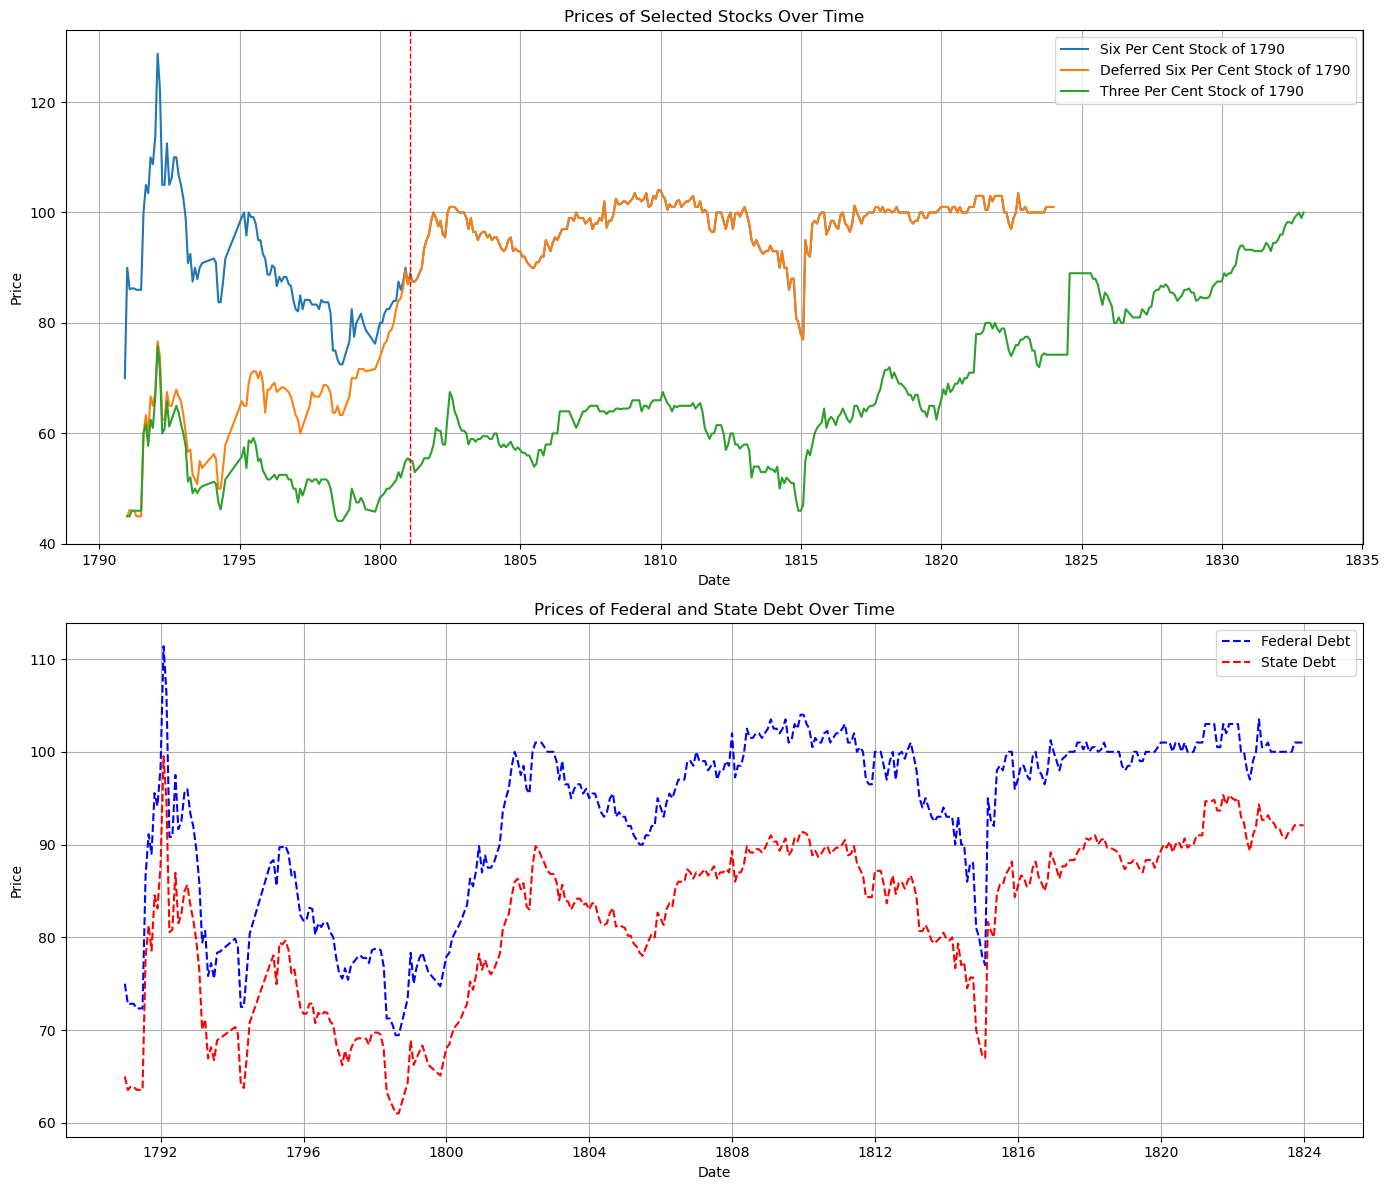

In [ ]:
plot_combined_prices(bond_price, l1_ids_of_interest, bond_names, federal_debt_df, state_debt_df)

### Graph Trends

 **Upward Spike ~1792, 1793**: 
  - This spike is most likely due to the Panic of 1792, a financial crisis that led to interventions by Treasury Secretary Alexander Hamilton to stabilize the market.
  - The issuance of bonds under Hamilton’s financial plan in the early 1790s contributed to growing confidence in the economy's ability to repay its debt.

 **Consistent Decline in the Late 1790s and Rise in the Early 1800s**:
  - The decline in the late 1790s could be attributed to political instability during the Quasi-War with France (1798-1800) and the impact of the Jay Treaty (1795).
  - However, we're not totally sure what caused the price swings then. 

 **Deferred 6% Stock Rise Towards ~100 in the Early 1800s**:
  - The rise was due to the deferred 6% stock becoming equivalent in value to the 6% stock in 1801, which was anticipated as the deferred stock started paying 6% interest.

 **Decline During the War of 1812**:
  - The War of 1812 (1812-1815) caused prices to drop as confidence in the government's ability to repay debts decreased.
  - The government’s increased spending on military expenses and the accumulation of more debt during the war further strained its ability to repay existing debts.

 **Post-1815 Increase**:
  - The increase in bond prices after 1815 was primarily due to the end of the War of 1812.
  - The end of the War of 1812 likely increased bond prices because it restored investor confidence in the government's stability and its ability to repay debts without having to deal with the additional burden of wartime expenses.

### Types of Loans Secured by the Continental Government

The Continental government secured:
- **Loan office certificates** were issued by loan offices in each state.
Prior to 1790, loan office certificates were purchased by small investors and quartermasters (used to purchase goods and pay for supplies for the army).
During the post-1790s, owners of domestic debt, which included loan office certificates, would receive a value of the three new bonds issued.
- **Final settlement certificates** (known as “Pierce certificates”) were issued to civilians and soldiers.
Further authorized by the Continental Congress, and issued by the Paymaster General and Commissioner of Army Accounts (John Pierce), final settlement certificates were debt certificates of rations owed to soldiers and officers of the Continental army for their services during the war.
- **Paper monies in the form of Continental dollars** (not interest-bearing) were originally used to buy loan office certificates, as well as pay back investors and also fund the war effort. After the Continental Congress was hindered from taxing under the Articles of Confederation, the value of paper monies collapsed significantly in 1778 and 1779. Under the Funding Act of 1790, 100 Continental dollars now traded for 1 Spanish dollar.
- **Foreign loans** consisted of French loans, Holland loans, and loans from Spain during the 1790s. Foreign loans were used to cover "current expenses" and compensate government officials. It is important to note that Hamilton's main focus was on paying back the domestic debt. As stated from source Bayley on page 32, section 2 of the Funding Act of 1790 "authorized a loan of 12,000,000 dollars to be applied to the payment of the principal and interest of the foreign debt." 

### Original Loan Contracts and Revisions

Congress attempted to pay people back through certificates of debt in the pre-1790s. Being prohibited from taxing under the Articles of Confederation, the Continental Congress was unable to raise enough money to pay interest on the debts, as well as the original principal payments. Under Hamilton’s Plan in the 1790s, paying back the national debt applied to both Continental dollars, referred as "bills of credit," and interest-bearing debts (mostly the latter since they have debt-ownership records that can be traced back only for interest-bearing debts, while Continental dollars heavily depreciated over time). 

To recap, debt values comprised of:
- Interest-bearing debts issued by the Continental Congress.
- State-issued debts.
- Continental Dollars (paper currency).
- Other forms of IOUs or certificates.

Federal debt amount in the United States in 1790 totaled to $52,788,722.03 (source Bayley, p. 31). This amount refers specifically to the debt held by the federal government before it assumed the debts of the individual states.

### Federal Debt

After assuming both Continental Congress and state debts, the federal government's total debt reached 74.3 million Spanish Dollars in September of 1790. For domestic federal debt, owners received two-thirds of the six percent stock and one-third of the deferred six percent stock. Owners of indent (IOU certificates used in place of currency that acted as a form of debt repayment) received 3% stock. The stocks helped create a more organized structure of debt repayment that utilized immediate payments through the 3% and 6% stocks, while the 6% deferred stock gave the government more room to spread out its debt payments. This lessened the financial burden on the government in the short-term, while guaranteeing creditors their debt repayments. The debtholders who bought the debt included holders of loan office certificates, certificates of indebtedness, as well as speculators who bought IOU’s at low interest rates from creditors. 



### State Debt

Regarding the state debt, the government was authorized to borrow 21,500,000 dollars in the Funding Act. A total of 18,271,787 dollars was assumed from source Bayley. 21,002,107 dollars was assumed from George Hall’s and Tom Sargent’s own records. For state-assumed debts, owners received 4/9 in the 6 percent stock, 2/9 in the deferred six percent stock, and 3/9 in the 3 percent stock. This included both principal and unpaid coupon payments. State debts varied by state, as some states had paid off most, if not all, of their debt, while other states still owed a majority of the debt mostly due to acquiring unpaid interest. As an example of what was authorized in the Funding Act, Delaware and Rhode Island owed the least state debt (200,000 dollars) while Massachusetts and Virginia owed the majority of the debt (4,000,000 dollars and 3,500,000 dollars, respectively).   